In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#load the data into a dataframe
bookings=pd.read_csv("/content/drive/MyDrive/hotel_bookings.csv")
bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
#finding out the number of records and columns
bookings.shape

(119390, 32)

In [ ]:
#a look into the columns in the dataset
bookings.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
#get more information about the data
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
bookings.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
bookings.duplicated().sum()

31994

In [ ]:
bookings=bookings.drop_duplicates()
bookings.duplicated().sum()

0

In [ ]:
bookings.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


In [ ]:
#replacing missing values in children column with median
bookings['children']= bookings['children'].fillna(bookings['children'].median())
bookings['agent']= bookings['agent'].fillna(0)


In [ ]:
bookings.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                                 0
company                           82137


Replacing missing values in categorical coilumsn can be done in three ways.
1. deleting the the missing records
2. replacing the the missing values with the most frequest value(mode) using fillna or unknown
3. Predicting the missing values by using classification algorithm.
I'll use the mode to replace the missing values in the country column

In [ ]:


#replacing missing values in country column with mode
bookings['country']= bookings['country'].fillna('unknown')



In [ ]:

bookings.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                               0
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                                 0
company                           82137


In [ ]:
   missing_percentage = bookings.isnull().sum() / len(bookings) * 100
   print(missing_percentage)

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.000000
babies                             0.000000
meal                               0.000000
country                            0.000000
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

the company column has approximately 94% of its data missing, hence it will be dropped

In [ ]:
bookings.drop('company',axis=1, inplace= True)
missing_percentage = bookings.isnull().sum() / len(bookings) * 100
print(missing_percentage)

hotel                             0.0
is_canceled                       0.0
lead_time                         0.0
arrival_date_year                 0.0
arrival_date_month                0.0
arrival_date_week_number          0.0
arrival_date_day_of_month         0.0
stays_in_weekend_nights           0.0
stays_in_week_nights              0.0
adults                            0.0
children                          0.0
babies                            0.0
meal                              0.0
country                           0.0
market_segment                    0.0
distribution_channel              0.0
is_repeated_guest                 0.0
previous_cancellations            0.0
previous_bookings_not_canceled    0.0
reserved_room_type                0.0
assigned_room_type                0.0
booking_changes                   0.0
deposit_type                      0.0
agent                             0.0
days_in_waiting_list              0.0
customer_type                     0.0
adr         

## EDA

In [ ]:
bookings.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,87396.0,0.274898,0.446466,0.00,0.0,0.0,1.0,1.0
lead_time,87396.0,79.891368,86.052325,0.00,11.0,49.0,125.0,737.0
arrival_date_year,87396.0,2016.210296,0.686102,2015.00,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,87396.0,26.838334,13.674572,1.00,16.0,27.0,37.0,53.0
arrival_date_day_of_month,87396.0,15.815541,8.835146,1.00,8.0,16.0,23.0,31.0
stays_in_weekend_nights,87396.0,1.005263,1.031921,0.00,0.0,1.0,2.0,19.0
stays_in_week_nights,87396.0,2.625395,2.053584,0.00,1.0,2.0,4.0,50.0
adults,87396.0,1.875795,0.626500,0.00,2.0,2.0,2.0,55.0
children,87396.0,0.138633,0.455871,0.00,0.0,0.0,0.0,10.0
babies,87396.0,0.010824,0.113597,0.00,0.0,0.0,0.0,10.0


In [ ]:
bookings.describe(include='object').T

,count,unique,top,freq
hotel,87396,2,City Hotel,53428
arrival_date_month,87396,12,August,11257
meal,87396,5,BB,67978
country,87396,178,PRT,27453
market_segment,87396,8,Online TA,51618
distribution_channel,87396,5,TA/TO,69141
reserved_room_type,87396,10,A,56552
assigned_room_type,87396,12,A,46313
deposit_type,87396,3,No Deposit,86251
customer_type,87396,4,Transient,71986


Text(0.5, 0, 'Hotel Type')

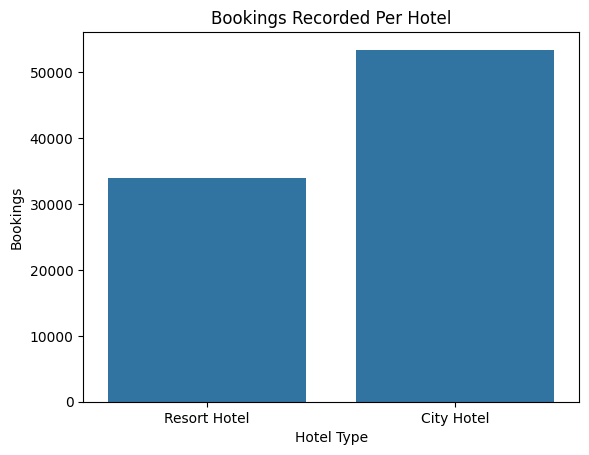

In [ ]:
sns.countplot(data=bookings, x='hotel')
plt.title('Bookings Recorded Per Hotel')
plt.ylabel('Bookings')
plt.xlabel('Hotel Type')

Text(0, 0.5, 'Number of confirmed bookings')

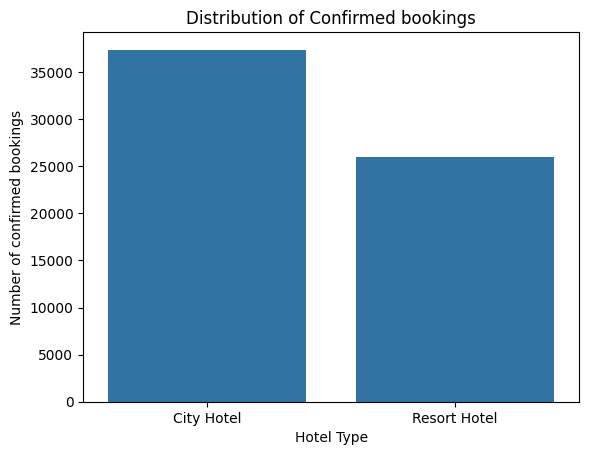

In [ ]:
#how many of these bookings were confirmed
confirmed_bookings=bookings[bookings['is_canceled']==0]['hotel'].value_counts()
sns.barplot(x=confirmed_bookings.index,y=confirmed_bookings)
plt.title("Distribution of Confirmed bookings")
plt.xlabel('Hotel Type')
plt.ylabel('Number of confirmed bookings')

Text(0, 0.5, 'Number of cancelled bookings')

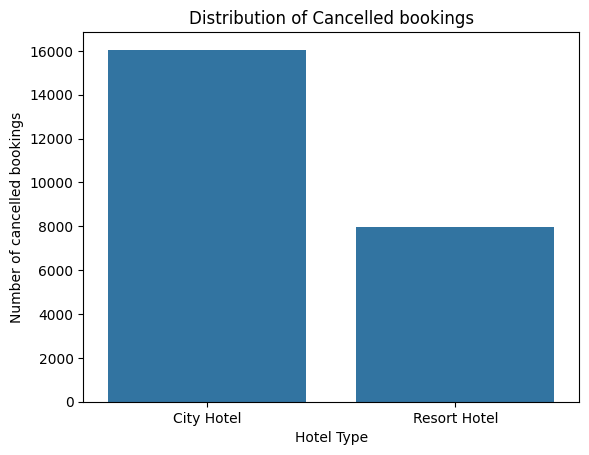

In [ ]:
#how many were cancelled
cancelled_bookings=bookings[bookings['is_canceled']==1]['hotel'].value_counts()
sns.barplot(x=cancelled_bookings.index, y=cancelled_bookings)
plt.title("Distribution of Cancelled bookings")
plt.xlabel('Hotel Type')
plt.ylabel('Number of cancelled bookings')

Text(0.5, 0, 'Reservation Status')

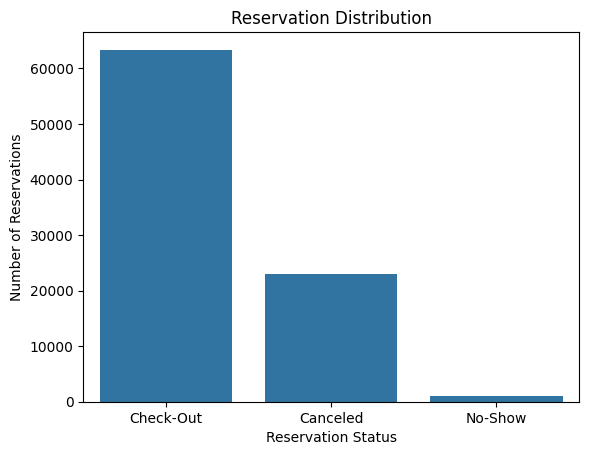

In [ ]:
sns.barplot(bookings['reservation_status'].value_counts())
plt.title("Reservation Distribution")
plt.ylabel('Number of Reservations')
plt.xlabel('Reservation Status')

Text(0.5, 0, 'Hotel types')

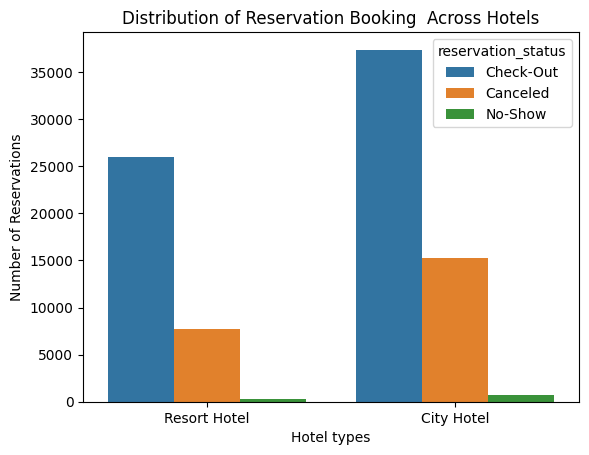

In [ ]:
#Lets see the distirbution of the reservation status across the hotels
sns.countplot(data=bookings, x=bookings['hotel'], hue='reservation_status')

plt.title("Distribution of Reservation Booking  Across Hotels")
plt.ylabel('Number of Reservations')
plt.xlabel('Hotel types')

Text(0.5, 0, 'Meal Type')

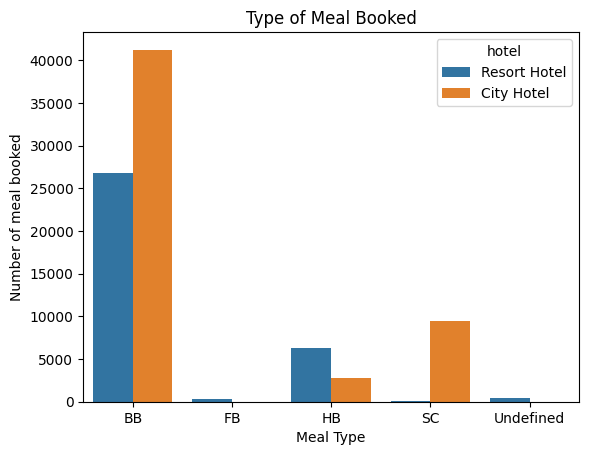

In [ ]:
#What meal was moslty ordered in each hotel
sns.countplot(data=bookings, x='meal', hue='hotel')
plt.title('Type of Meal Booked')
plt.ylabel('Number of meal booked')
plt.xlabel('Meal Type')

Text(0.5, 0, 'Markets')

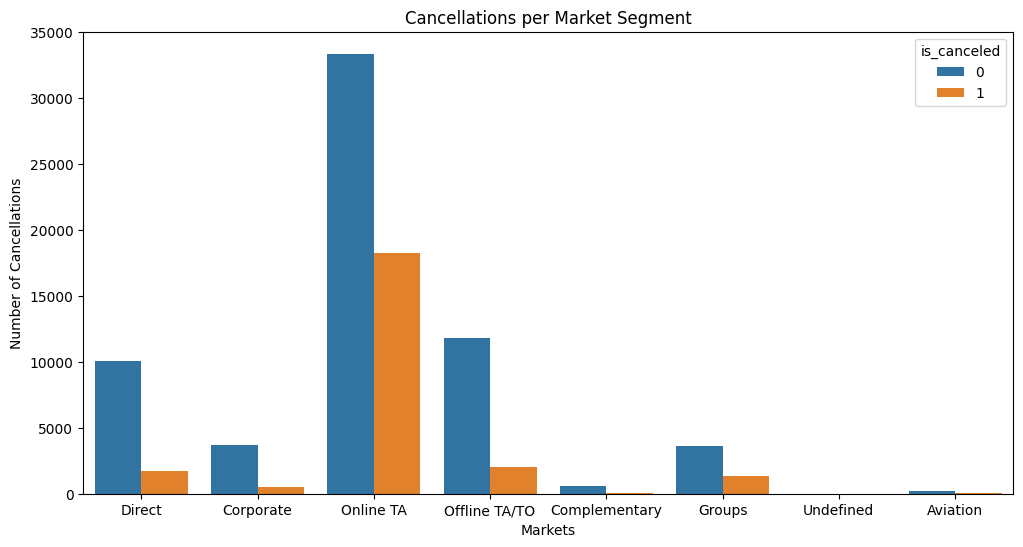

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(bookings, x='market_segment', hue='is_canceled')
plt.title('Cancellations per Market Segment')
plt.ylabel('Number of Cancellations')
plt.xlabel('Markets')

Text(0.5, 0, 'Year')

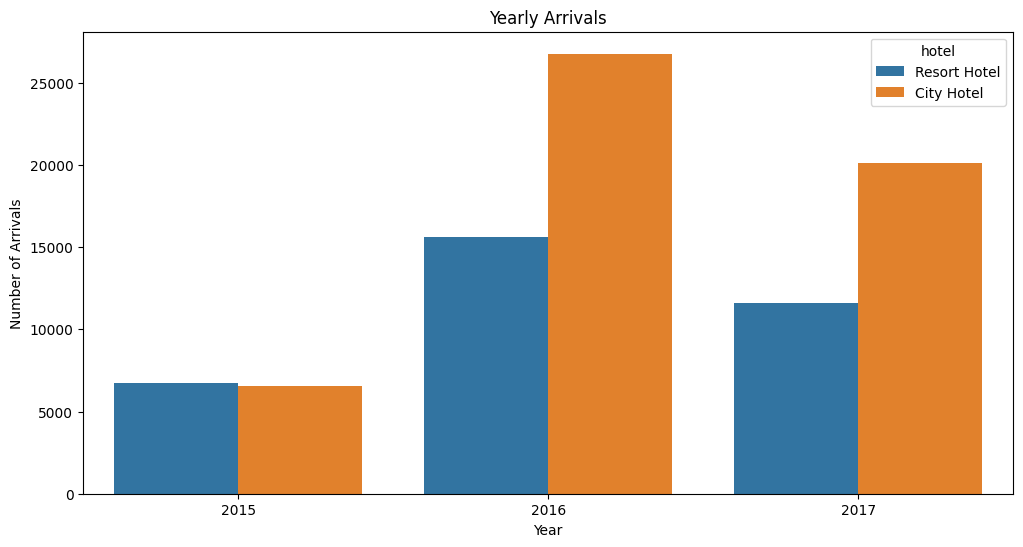

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=bookings, x='arrival_date_year', hue='hotel',
              )
plt.title('Yearly Arrivals')
plt.ylabel('Number of Arrivals')
plt.xlabel('Year')

Text(0.5, 0, 'Month')

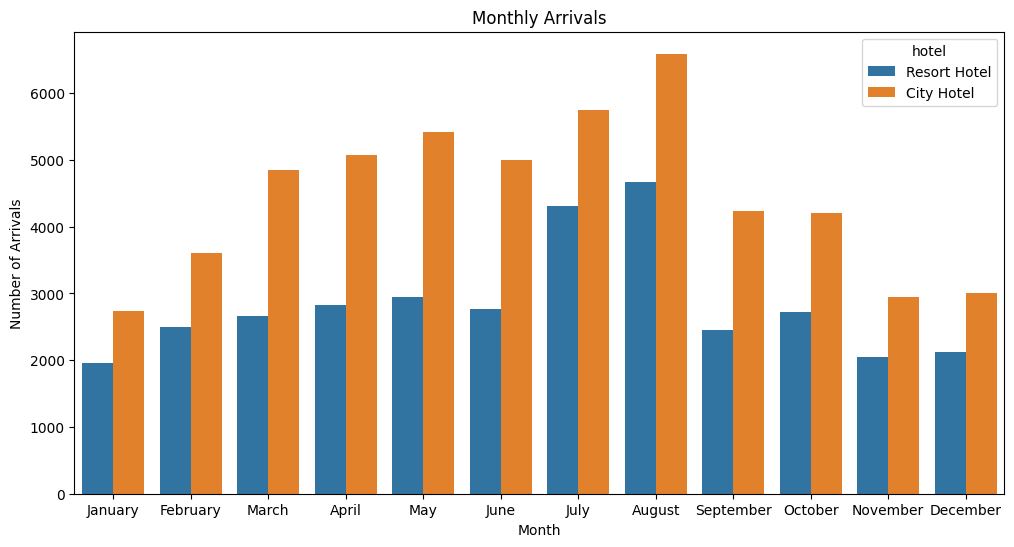

In [ ]:

plt.figure(figsize=(12, 6))
sns.countplot(data=bookings, x='arrival_date_month', hue='hotel',
              order=['January', 'February', 'March', 'April', 'May',
                     'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Monthly Arrivals')
plt.ylabel('Number of Arrivals')
plt.xlabel('Month')


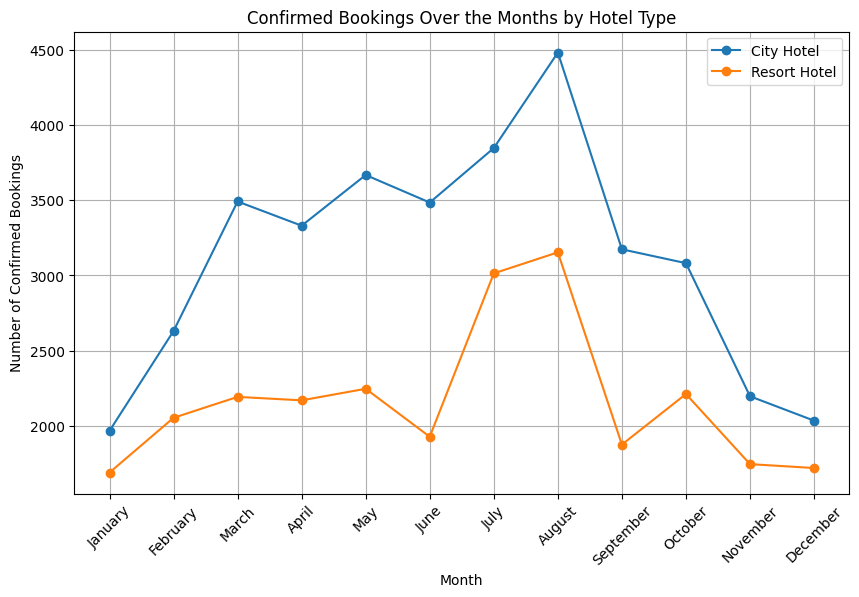

In [ ]:
#Lets look at the number of confiormed bookings accross the 12 months

# Filter the dataset for confirmed bookings
confirmed_bookings = bookings[bookings['is_canceled'] == 0]

# Group by month and hotel type and count the number of confirmed bookings
confirmed_by_month_hotel = confirmed_bookings.groupby(['arrival_date_month', 'hotel']).size().unstack()

# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Reorder the index of the DataFrame according to month_order
confirmed_by_month_hotel = confirmed_by_month_hotel.reindex(month_order)

# Plot the line graph
plt.figure(figsize=(10, 6))

# Plot each hotel type as a separate line
for hotel_type in confirmed_by_month_hotel.columns:
    plt.plot(confirmed_by_month_hotel.index, confirmed_by_month_hotel[hotel_type],
             marker='o', linestyle='-', label=hotel_type)

plt.title('Confirmed Bookings Over the Months by Hotel Type')
plt.xlabel('Month')
plt.ylabel('Number of Confirmed Bookings')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
#Nationality of guests with confirmed bookings
country_guests=bookings[bookings['is_canceled']==0]['country'].value_counts().reset_index()
country_guests.columns=['country','Guests']
country_guests

,country,Guests
0,PRT,17662
1,GBR,8448
2,FRA,7104
3,ESP,5390
4,DEU,4334
...,...,...
161,ZMB,1
162,SYC,1
163,MDG,1
164,SMR,1


<Axes: ylabel='hotel'>

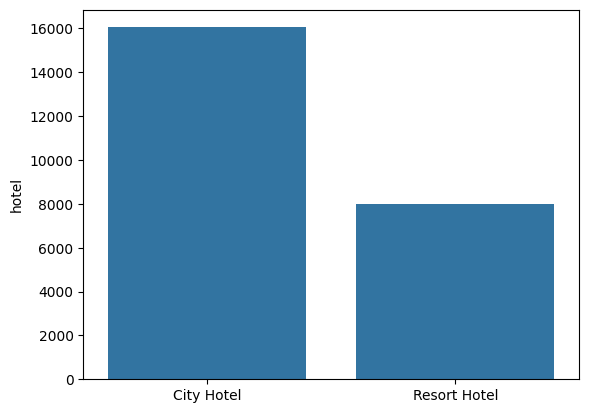

In [ ]:
cancelled_bookings=bookings[bookings['is_canceled']==1]['hotel'].value_counts()
sns.barplot(cancelled_bookings)

<Axes: ylabel='hotel'>

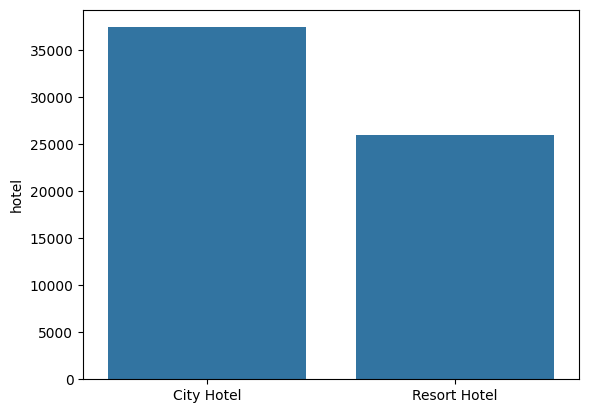

Text(0.5, 1.0, 'Bookings made by Repeated customers')

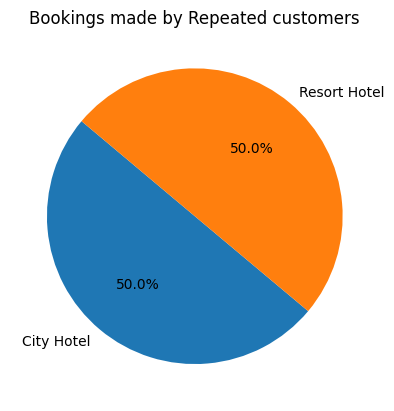

In [ ]:
#Has customer booked a room at the hotel before
repeated_guest=bookings[bookings['is_repeated_guest']==1]['hotel'].value_counts()
plt.pie(repeated_guest, labels=repeated_guest.index, autopct='%1.1f%%', startangle=140)
plt.title('Bookings made by Repeated customers')

Text(0.5, 1.0, 'Bookings made by New guests')

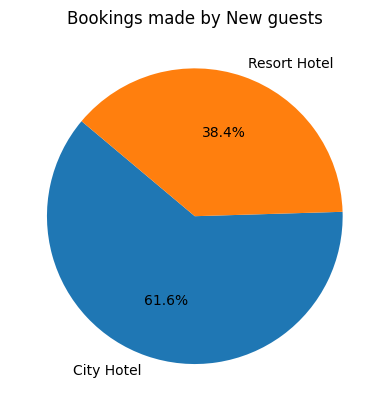

In [ ]:

#Has customer booked a room at the hotel before
new_guest=bookings[bookings['is_repeated_guest']==0]['hotel'].value_counts()
plt.pie(new_guest, labels=new_guest.index, autopct='%1.1f%%', startangle=140)
plt.title('Bookings made by New guests')